In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Git and Github
### 90pts total, due **Monday Feb 12th** 11:59 pm

This week we are posting the homework on Github classroom. You should
1) Accept the assignment invitation on Github Classroom: https://classroom.github.com/a/gQvUUXL9
2) This will create a private Github repository for you on our course site: https://github.com/bds311-sp24. Thus repo is also visible to instructors.
3) You should clone this repository so you can work on Jupyter Hub (or your own computer).
4) Once you’re finished with hw04.ipynb you need to save the notebook and upload the zip file to gradescope as usual. Note that there is an option on gradescope to submit from github. *This gradescope submission is worth 60 pts.* We also expect you to make multiple commits, which you push to your Github repository. (30 pts)

This [page](https://bds311.github.io/git_clone) provides directions on cloning a repository from github -- which we also covered in class.




In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

<!-- BEGIN QUESTION -->


### Question 1: Making a gh-pages site (10 pts)

We've written some [instructions for making a website on github](https://bds311.github.io/gh_pages)

Please post below a URL to your gh-pages website (i.e. `https://<username>.github.io`).
Make sure your website repository has these 3 things:

1. A `README.md` file that is the homepage for your website
2. A second page in your repository `cultural_rec.md` that lists some book, show, TV, drawing, piece of art you recommend. Try to include a link to an outside site with more information.
3. A link in `README.md` that sends visitors to your recommendation markdown file.

Type your personal gh-pages URL below.

- 5 pts: website exists
- 5 pts: website follows directions


https://github.com/marinawitherell/BDS311_hw4_q1/blob/main/README.md 

<!-- END QUESTION -->

### Question 2 (5 pts):
Read `mauna_loa.csv` into Pandas as a dataframe and make a scatter plot of carbon dioxide over time using the `CO2` and `decimal_date` columns.  
This is a manually graded question:  
  
- 3 pts: correct x and y data on plot
- 2 pts: x label, y label, and title

<!-- BEGIN QUESTION -->



Text(0.5, 1.0, 'CO2 Levels Over Time')

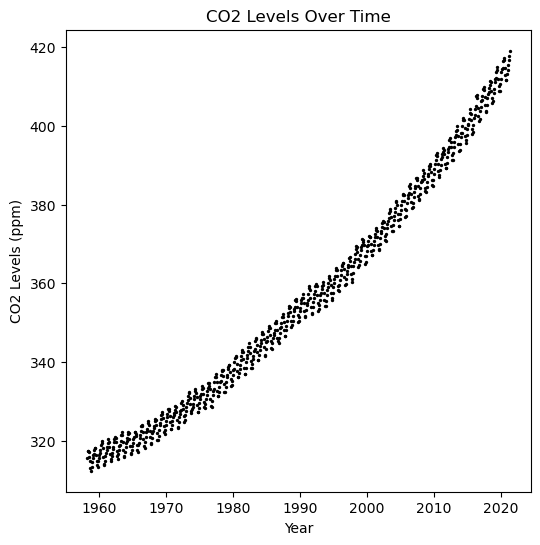

In [3]:
df = pd.read_csv('mauna_loa.csv')

fig=plt.figure()
fig.set_size_inches(6,6)
ax=fig.add_subplot(111)

ax.scatter(df['decimal_date'], df['CO2'], s=2, color='k')
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Levels (ppm)')
ax.set_title('CO2 Levels Over Time')

<!-- END QUESTION -->

### Question 3: Find the mean CO2 level by year (5 pts).

Save these data as a pandas series `mean_co2_by_year` where the years are the index and yearly mean c02 levels are values.    


In [4]:
# don't forget to save your data to the variable mean_co2_by_year
mean_co2_by_year = df.groupby('year').agg('mean')['CO2']

In [5]:
grader.check("q3")

q3 results: All test cases passed!

### Question 4: Plot the yearly mean C02 levels over time  (5 pts)

Add to your code that made scatter plot in Question 2 by overlaying yearly mean CO2 level in a different color.

This plot is manually graded
- 3 pts: correct values for yearly mean CO2
- 2 pts: legend label + axis labels
  
Your plot should something look like this...  
  
<img src="./q3plot.png" width="600" height="400">

<!-- BEGIN QUESTION -->



Text(0.5, 1.0, 'CO2 Levels Over Time')

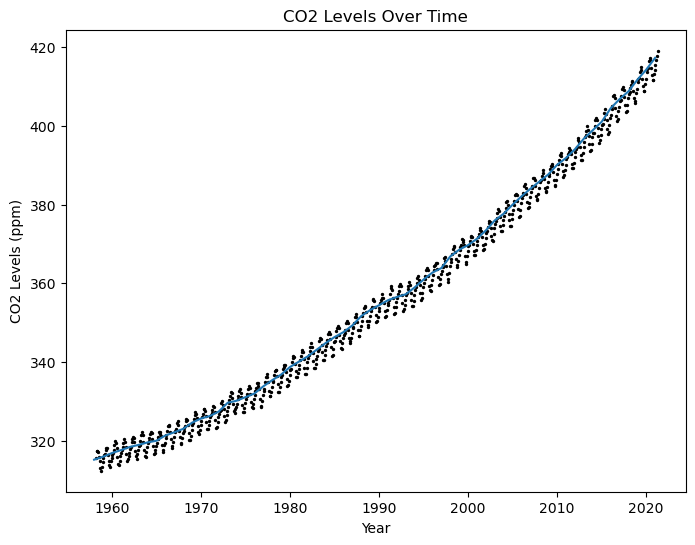

In [6]:
fig=plt.figure()
fig.set_size_inches(8,6)
ax=fig.add_subplot(111)

ax.scatter(df['decimal_date'], df['CO2'], s=2, color='k')
ax.plot(mean_co2_by_year)
ax.set_xlabel('Year')
ax.set_ylabel('CO2 Levels (ppm)')
ax.set_title('CO2 Levels Over Time')

<!-- END QUESTION -->

### Question 5: Find max and min year-to-year CO2 change (10 pts).

Determine the maximum and minimum year-to-year CO2 change. Save these to the variables `max_diff` and `min_diff`.  
Across what years did the minimum and maximum change occur?  
Save each year as an integer into the variables `max_year` and `min_year`

*Hints:*  The `np.diff()` function returns the difference between each value in an array or series.  
You can index a series with a logical condition.



In [8]:
# Save max and min CO2 
diff_df = np.diff(mean_co2_by_year)
max_diff= max(diff_df)
min_diff= min(diff_df)

# Save the years where the max and min difference happened as integers   
def get_year(diff):
    num = np.where(np.diff(mean_co2_by_year) == diff)
    i = 1
    for years in mean_co2_by_year.index:
        if i == num[0]:
            return i + 1959
        else:
            i = i+1

max_year= get_year(max_diff)
min_year= get_year(min_diff)



In [9]:
grader.check("q5")

q5 results: All test cases passed!

## PANCAN12

[PANCAN12](https://www.cancer.gov/news-events/press-releases/2018/tcga-pancancer-atlas) is a subset of the PanCancer Atlas which is a data set of molecular and clinical information from over 10,000 tumors representing 33 types of cancer.

An [Article about the dataset](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3919969/)

For questions 6-8, we will look at a subset of the PANCAN12 dataset that including patient records who were treated for lung cancer.  There are 94 columns in this data file!


In [10]:
# First read in pancan12 lung cancer data as df
df = pd.read_csv('tcga_whitelist_tumor.csv')
df.head(2)

,#,pre_bronchodilator_fev1_percent,gel_image_file,analyte_type,anatomic_organ_subdivision,icd_o_3_site,intermediate_dimension,vital_status,days_to_death,person_neoplasm_cancer_status,...,method_of_sample_procurement,days_to_birth,karnofsky_performance_score,number_pack_years_smoked,tobacco_smoking_history_indicator,NCNNCT_OthMethONSP,bcr_sample_barcode,diagnosis,eastern_cancer_oncology_group,longest_dimension_cm
0,TCGA-90-6837-01A-11D-1943-01,NaN,https://atlas.intgen.org/bcr-data/Molecular%20...,DNA,R-Upper,C34.8,.8 cm,LIVING,NaN,NaN,...,NaN,-23511.0,NaN,40.0,Current reformed smoker for < or = 15 years,NaN,TCGA-90-6837-01A,Lung Squamous Cell Carcinoma,0.0,1.6
1,TCGA-66-2759-01A-01R-0850-03,NaN,https://atlas.intgen.org/bcr-data/Molecular%20...,RNA,NaN,C34.3,0.8 cm,LIVING,NaN,NaN,...,NaN,-24287.0,NaN,16.0,Current reformed smoker for > 15 years,NaN,TCGA-66-2759-01A,Lung Squamous Cell Carcinoma,NaN,1.0


#### Question 6: Plot cumulative smoking vs age (5 pts)

In df, the column 
`days_to_birth` is a negative number indicating how many days ago person was born.
`number_pack_years_smoked` is number of packs smoked per day multiplied by number of years. 1 pack year is 1 pack per day for 1 year. 
  
  
Use the `days_to_birth` column to calculate ages in years. You can assume there are 365 days in a year. Add this as a new column to Data Frame named `ages`.

Make a scatter plot where **age in years** is on horizontal axis and **packs smoked per year** is on vertical axis.
*Hint*: You can assume there are 365 days in a year...


Text(0.5, 1.0, 'Packs Smoked per Year vs Age')

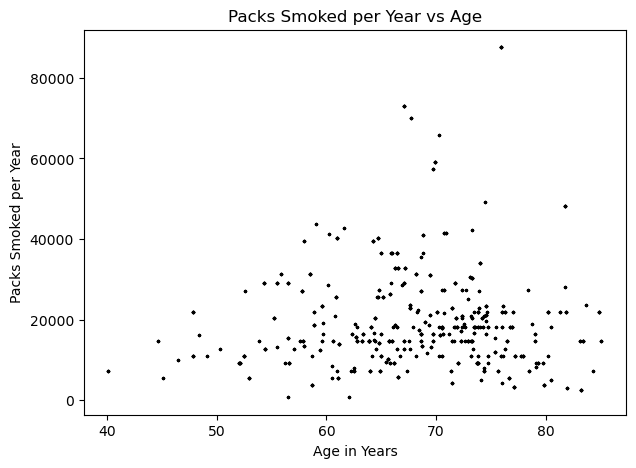

In [11]:
df.insert(10, "ages", df['days_to_birth'] / -365)

fig=plt.figure()
fig.set_size_inches(7,5)
ax=fig.add_subplot(111)

ax.scatter(df['ages'], df['number_pack_years_smoked']*365, s=2, color='k')
ax.set_xlabel('Age in Years')
ax.set_ylabel('Packs Smoked per Year')
ax.set_title('Packs Smoked per Year vs Age')

In [12]:
grader.check("q6")

q6 results: All test cases passed!

#### Question 7: Grouping by a variable (10 pts)

The [Eastern Cancer Oncology Group](https://www.mypcnow.org/fast-fact/eastern-cooperative-oncology-group-performance-status/) is a measure of patient's functional status. It goes from a scale of 0 (fully active) to 4 (Totally confined to Bed or Chair). In this data set, patients are in category 0, 1, 2, and 3.

How many patients are in each of these 4 categories?  Assign the answer to a pandas_series, `eastern_counts`.


In [13]:
eastern_groups = df.groupby('eastern_cancer_oncology_group').agg('count')
eastern_counts= eastern_groups['vital_status']

In [14]:
grader.check("q7")

q7 results: All test cases passed!

### Question 8: What is the mean age of patients in each of the four functional categories? (10 pts)
Assign these means to `eastern_ages`

In [15]:
eastern_ages= survival_by_fare_class=df.groupby('eastern_cancer_oncology_group')['ages'].mean()

In [16]:
grader.check("q8")

q8 results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 9: Github push  (30 pts)

Enter your github username below so we can verify your commit of hw04.ipynb to github.com/bds311-sp24
Also submit on gradescope, per usual.

<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [17]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q3 results: All test cases passed!

    q5 results: All test cases passed!

    q6 results: All test cases passed!

    q7 results: All test cases passed!

    q8 results: All test cases passed!
